# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output file (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)  #variable that holds an iterator for easy access to these coordinate pairs.

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la passe
Processing Record 2 of Set 1 | nampula
Processing Record 3 of Set 1 | udachny
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | howard springs
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | zemio
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | borogontsy
Processing Record 11 of Set 1 | nova vicosa
Processing Record 12 of Set 1 | donaldsonville
Processing Record 13 of Set 1 | dudinka
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | leitchfield
Processing Record 16 of Set 1 | tulun
Processing Record 17 of Set 1 | mawu
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | tralee
Processing Record 20 of Set 1 | weno
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | ushuaia
Pr

Processing Record 38 of Set 4 | farap
Processing Record 39 of Set 4 | north ward
Processing Record 40 of Set 4 | dalandzadgad
Processing Record 41 of Set 4 | salinopolis
Processing Record 42 of Set 4 | nagqu
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | kismayo
Processing Record 45 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 46 of Set 4 | nelidovo
Processing Record 47 of Set 4 | illapel
Processing Record 48 of Set 4 | kharp
Processing Record 49 of Set 4 | chelak
Processing Record 0 of Set 5 | san antonio de pale
Processing Record 1 of Set 5 | vilyuchinsk
Processing Record 2 of Set 5 | tejen
Processing Record 3 of Set 5 | kourou
Processing Record 4 of Set 5 | margate
Processing Record 5 of Set 5 | la ronge
Processing Record 6 of Set 5 | kashgar
Processing Record 7 of Set 5 | palmer
Processing Record 8 of Set 5 | bengkulu
Processing Record 9 of Set 5 | bom jesus
Processing Record 10 of Set 5 | puerto san carlos
City not found. Skipping...
P

Processing Record 27 of Set 8 | chui
Processing Record 28 of Set 8 | st. john's
Processing Record 29 of Set 8 | dass
Processing Record 30 of Set 8 | tual
Processing Record 31 of Set 8 | urangan
Processing Record 32 of Set 8 | starobin
Processing Record 33 of Set 8 | necochea
Processing Record 34 of Set 8 | souillac
Processing Record 35 of Set 8 | meadow lake
Processing Record 36 of Set 8 | el molino
Processing Record 37 of Set 8 | mandera
Processing Record 38 of Set 8 | tarrafal de sao nicolau
Processing Record 39 of Set 8 | leppavirta
Processing Record 40 of Set 8 | karakul'
City not found. Skipping...
Processing Record 41 of Set 8 | banamba
Processing Record 42 of Set 8 | taltal
Processing Record 43 of Set 8 | richards bay
Processing Record 44 of Set 8 | sao joao de pirabas
Processing Record 45 of Set 8 | harstad
Processing Record 46 of Set 8 | jaru
Processing Record 47 of Set 8 | tefe
Processing Record 48 of Set 8 | tamanrasset
Processing Record 49 of Set 8 | grand island
Processing

Processing Record 22 of Set 12 | samarra'
City not found. Skipping...
Processing Record 23 of Set 12 | glace bay
Processing Record 24 of Set 12 | girvan
Processing Record 25 of Set 12 | faya-largeau
Processing Record 26 of Set 12 | saint-philippe
Processing Record 27 of Set 12 | tyukhtet
Processing Record 28 of Set 12 | salahonda
Processing Record 29 of Set 12 | lamu
Processing Record 30 of Set 12 | abepura
Processing Record 31 of Set 12 | rovaniemi
Processing Record 32 of Set 12 | basciftlik
Processing Record 33 of Set 12 | kangding
Processing Record 34 of Set 12 | swinoujscie
Processing Record 35 of Set 12 | puerto armuelles
Processing Record 36 of Set 12 | camarinas
Processing Record 37 of Set 12 | olbia
Processing Record 38 of Set 12 | general villegas
Processing Record 39 of Set 12 | toliara
Processing Record 40 of Set 12 | mount darwin
Processing Record 41 of Set 12 | tabas
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la passe,45.5549,-0.8967,23.13,73,100,2.16,FR,1722311853
1,nampula,-15.1165,39.2666,16.97,100,20,1.03,MZ,1722311854
2,udachny,66.4167,112.4000,15.88,48,29,6.50,RU,1722311855
3,port mathurin,-19.6833,63.4167,22.00,70,86,6.99,MU,1722311857
4,ilulissat,69.2167,-51.1000,2.34,93,100,0.75,GL,1722311858


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la passe,45.5549,-0.8967,23.13,73,100,2.16,FR,1722311853
1,nampula,-15.1165,39.2666,16.97,100,20,1.03,MZ,1722311854
2,udachny,66.4167,112.4000,15.88,48,29,6.50,RU,1722311855
3,port mathurin,-19.6833,63.4167,22.00,70,86,6.99,MU,1722311857
4,ilulissat,69.2167,-51.1000,2.34,93,100,0.75,GL,1722311858


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

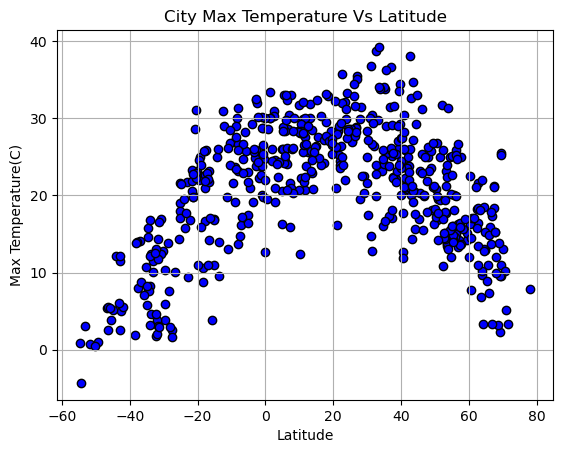

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], facecolor="blue", edgecolor= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Max Temperature Vs Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

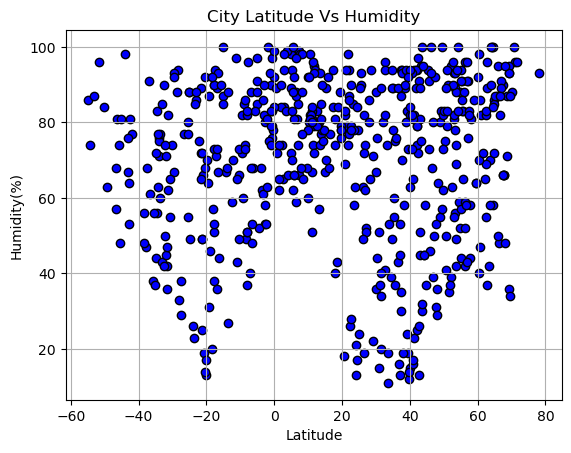

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], facecolor="blue", edgecolor= "black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude Vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

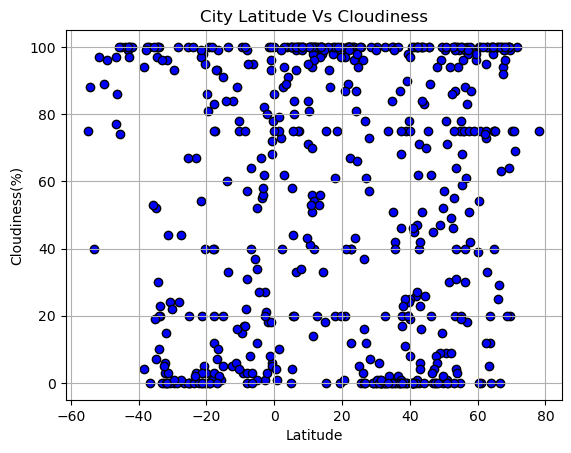

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], facecolor="blue", edgecolor= "black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude Vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

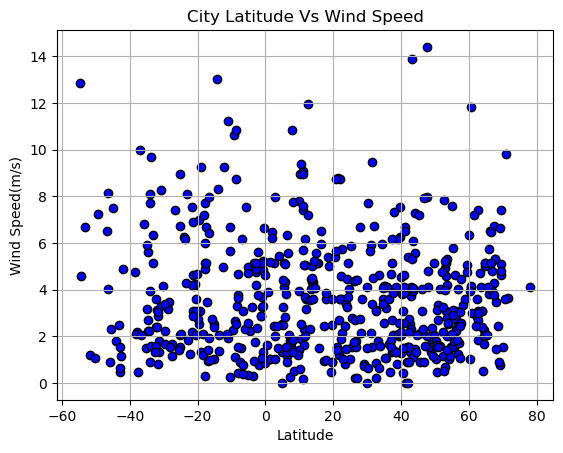

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], facecolor="blue", edgecolor= "black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude Vs Wind Speed")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:

# Define a function to create Linear Regression plots
def lin_reg(data_df, column):
    x_values = data_df["Lat"]
    y_values = data_df[column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    print(f'The r value is {rvalue}')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(column)
    plt.show()

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"]>=0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la passe,45.5549,-0.8967,23.13,73,100,2.16,FR,1722311853
2,udachny,66.4167,112.4000,15.88,48,29,6.50,RU,1722311855
4,ilulissat,69.2167,-51.1000,2.34,93,100,0.75,GL,1722311858
7,zemio,5.0314,25.1361,20.57,98,100,1.31,CF,1722311862
9,borogontsy,62.6683,131.1683,16.40,89,100,3.08,RU,1722311864


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nampula,-15.1165,39.2666,16.97,100,20,1.03,MZ,1722311854
3,port mathurin,-19.6833,63.4167,22.00,70,86,6.99,MU,1722311857
5,howard springs,-12.4970,131.0470,30.95,59,5,4.98,AU,1722311859
6,edinburgh of the seven seas,-37.0676,-12.3116,14.05,91,100,10.00,SH,1722311860
8,port-aux-francais,-49.3500,70.2167,1.00,63,96,7.23,TF,1722311863


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.5990643949804285


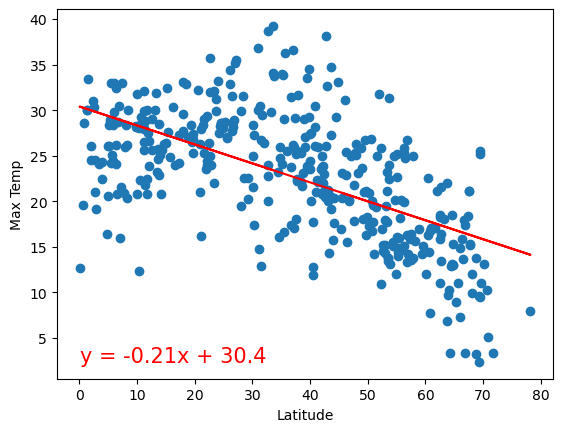

In [42]:
# Linear regression on Northern Hemisphere
lin_reg(data_df= northern_hemi_df, column= "Max Temp")


The r value is 0.7978381235538986


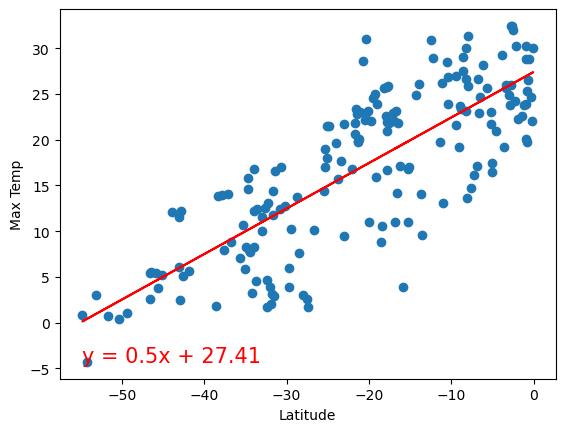

In [43]:
# Linear regression on Southern Hemisphere
lin_reg(data_df= southern_hemi_df, column= "Max Temp")

**Discussion about the linear relationship: THe above graphic data reflects the relationhip between latitude and temperture. The farther north you travel the cooler the temperaturate gets, the opposite is true for traveling south. There is a strong correlation with warm climates closer to the equater and colder climates farther away from the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r value is -0.05894086552353423


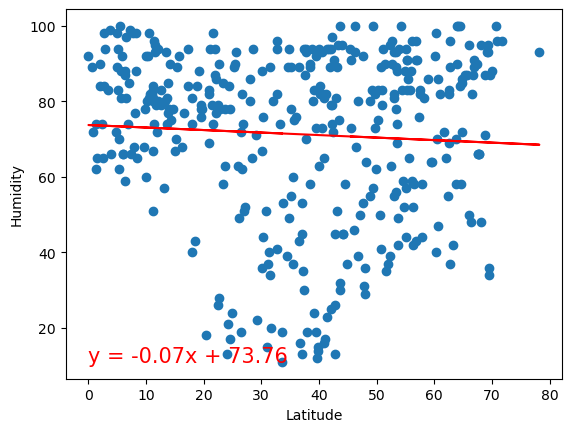

In [44]:
# Northern Hemisphere
lin_reg(data_df= northern_hemi_df, column= "Humidity")

The r value is 0.10642023832724534


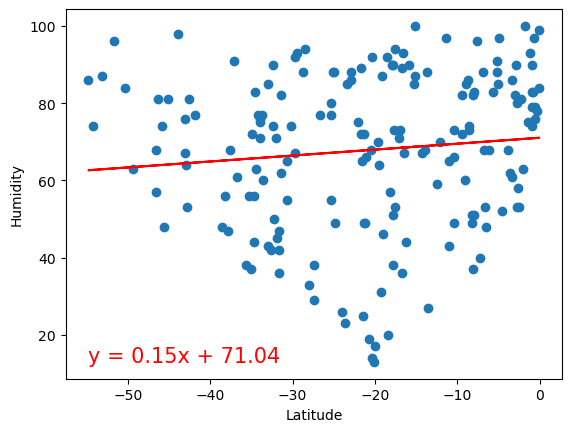

In [45]:
# Southern Hemisphere
lin_reg(data_df= southern_hemi_df, column= "Humidity")

**Discussion about the linear relationship: Based on the graph, it does not seem like humiditiy is very dependent on latitude. Humidity may vary based on multiple factors.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is -0.0633917763845741


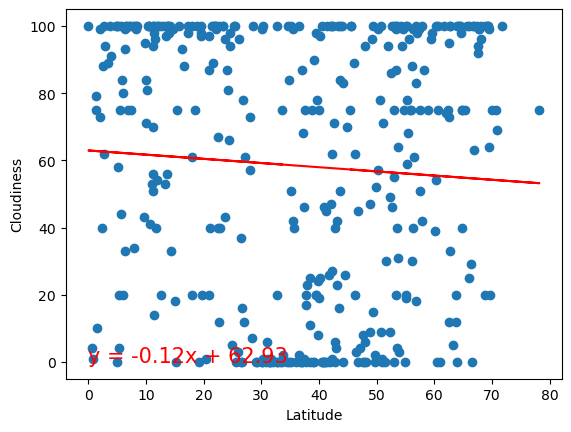

In [46]:
# Northern Hemisphere
lin_reg(data_df= northern_hemi_df, column= "Cloudiness")

The r value is -0.17595286462577395


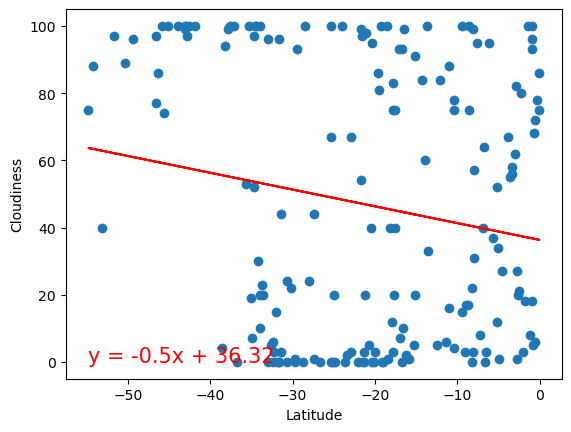

In [47]:
# Southern Hemisphere
lin_reg(data_df= southern_hemi_df, column= "Cloudiness")

**Discussion about the linear relationship: Based on the graph there seems to be a weak correlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r value is -0.01104582571173062


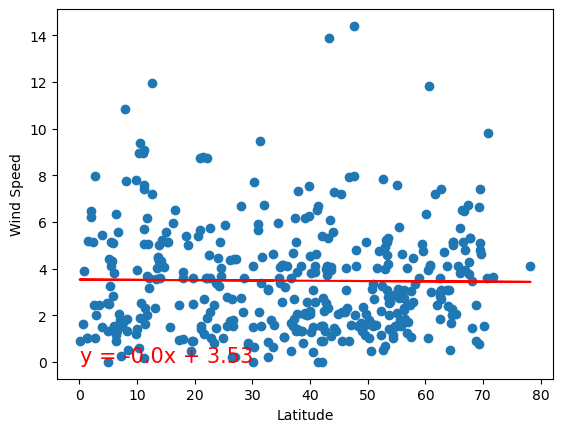

In [48]:
# Northern Hemisphere
lin_reg(data_df= northern_hemi_df, column= "Wind Speed")

The r value is -0.042465699865880835


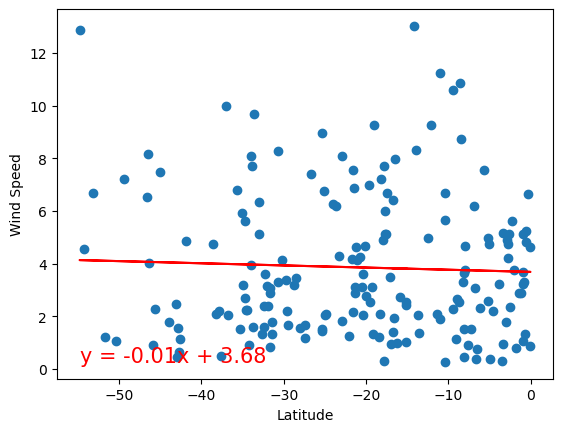

In [49]:
# Southern Hemisphere
lin_reg(data_df= southern_hemi_df, column= "Wind Speed")

**Discussion about the linear relationship:Based on the graph there does not seem to be a clear correlation between wind speed and latitude. 